In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers # lr 조정할때 쓰임

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

import numpy as np
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt

df_gen = pd.read_csv('2.Kaggle/210722 titanic/gender_submission.csv', header=0)
df_train = pd.read_csv('2.Kaggle/210722 titanic/train.csv', header=0)
df_test = pd.read_csv('2.Kaggle/210722 titanic/test.csv', header=0)

In [4]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**결측치 개수 확인

In [5]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**단일값 삭제(Pairwise) 특정 열들중에 결측치가 있을 경우에 해당 행을 삭제

In [6]:
df = df_train.dropna(subset=['Age'])
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [7]:
df = df.drop(['Cabin','Name','Ticket'], axis = 1)

**astype(‘category’).cat.codes numerical 데이터로 변경하고 싶은 categorical 컬럼을 정한 뒤,
categorical 형 column으로 강제 형변환을 시키고 cat.codes를 호출해 주면 자동으로 숫자형 리턴

In [8]:
df['Embarked'] = df['Embarked'].astype('category').cat.codes

In [9]:
df['Sex'] = df['Sex'].astype('category').cat.codes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    int8   
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Fare         714 non-null    float64
 8   Embarked     714 non-null    int8   
dtypes: float64(2), int64(5), int8(2)
memory usage: 46.0 KB


**그럼 이제 모든 값의 데이터를 int or float으로 변경완료
데이터 x,y값 설정, standardScaler로 그래프 그리기

In [11]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
df_gen.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [13]:
df_test['Survived'] = df_gen['Survived']

In [14]:
df_test['Sex'] = df_test['Sex'].astype('category').cat.codes
df_test['Embarked'] = df_test['Embarked'].astype('category').cat.codes
df_test = df_test.drop(['Cabin','Name','Ticket'], axis = 1)

In [15]:
df_test = df_test.fillna(0)

In [16]:
x_test = df_test[["PassengerId", "Pclass", "Sex","Age", "SibSp", "Parch", "Fare", "Embarked"]]

In [17]:
y_test = df_test[["Survived"]]

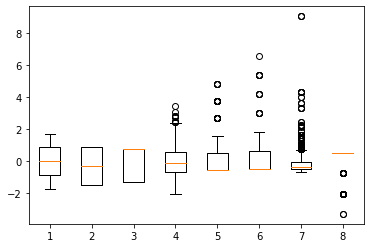

In [18]:
x = df[["PassengerId", "Pclass", "Sex","Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = pd.DataFrame(df["Survived"])

x_ss = StandardScaler().fit_transform(x)
y_ss = StandardScaler().fit_transform(y)
plt.boxplot(x_ss)
plt.show()

In [66]:
model = Sequential()
model.add(Dense(200, input_dim=len(x.keys()), activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 학습과정 설정
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

# 모델 학습시키기
model.fit(x, y, epochs=300, batch_size=10)

Epoch 1/300
72/72 [==============================] - 0s 499us/step - loss: 1.1005 - accuracy: 0.5448
Epoch 2/300
72/72 [==============================] - 0s 485us/step - loss: 0.7522 - accuracy: 0.5994
Epoch 3/300
72/72 [==============================] - 0s 513us/step - loss: 0.6746 - accuracy: 0.6443
Epoch 4/300
72/72 [==============================] - 0s 485us/step - loss: 0.6790 - accuracy: 0.6317
Epoch 5/300
72/72 [==============================] - 0s 582us/step - loss: 0.6438 - accuracy: 0.6373
Epoch 6/300
72/72 [==============================] - 0s 471us/step - loss: 0.6345 - accuracy: 0.6681
Epoch 7/300
72/72 [==============================] - 0s 471us/step - loss: 0.6097 - accuracy: 0.6835
Epoch 8/300
72/72 [==============================] - 0s 457us/step - loss: 0.6228 - accuracy: 0.6737
Epoch 9/300
72/72 [==============================] - 0s 540us/step - loss: 0.6107 - accuracy: 0.6695
Epoch 10/300
72/72 [==============================] - 0s 471us/step - loss: 0.6359 - accura

Epoch 81/300
72/72 [==============================] - 0s 471us/step - loss: 0.4738 - accuracy: 0.7941
Epoch 82/300
72/72 [==============================] - 0s 485us/step - loss: 0.4550 - accuracy: 0.7997
Epoch 83/300
72/72 [==============================] - 0s 485us/step - loss: 0.4660 - accuracy: 0.7997
Epoch 84/300
72/72 [==============================] - 0s 443us/step - loss: 0.4568 - accuracy: 0.7941
Epoch 85/300
72/72 [==============================] - 0s 457us/step - loss: 0.4626 - accuracy: 0.7829
Epoch 86/300
72/72 [==============================] - 0s 457us/step - loss: 0.4634 - accuracy: 0.7829
Epoch 87/300
72/72 [==============================] - 0s 485us/step - loss: 0.4766 - accuracy: 0.7843
Epoch 88/300
72/72 [==============================] - 0s 513us/step - loss: 0.4659 - accuracy: 0.7899
Epoch 89/300
72/72 [==============================] - 0s 609us/step - loss: 0.4572 - accuracy: 0.7955
Epoch 90/300
72/72 [==============================] - 0s 720us/step - loss: 0.4579

72/72 [==============================] - 0s 540us/step - loss: 0.3937 - accuracy: 0.8263
Epoch 161/300
72/72 [==============================] - 0s 568us/step - loss: 0.3968 - accuracy: 0.8333
Epoch 162/300
72/72 [==============================] - 0s 637us/step - loss: 0.4168 - accuracy: 0.8137
Epoch 163/300
72/72 [==============================] - 0s 568us/step - loss: 0.3822 - accuracy: 0.8249
Epoch 164/300
72/72 [==============================] - 0s 582us/step - loss: 0.4223 - accuracy: 0.8109
Epoch 165/300
72/72 [==============================] - 0s 582us/step - loss: 0.3987 - accuracy: 0.8263
Epoch 166/300
72/72 [==============================] - 0s 568us/step - loss: 0.3814 - accuracy: 0.8235
Epoch 167/300
72/72 [==============================] - 0s 596us/step - loss: 0.3925 - accuracy: 0.8263
Epoch 168/300
72/72 [==============================] - 0s 568us/step - loss: 0.3888 - accuracy: 0.8235
Epoch 169/300
72/72 [==============================] - 0s 568us/step - loss: 0.4563 - a

72/72 [==============================] - 0s 540us/step - loss: 0.3678 - accuracy: 0.8347
Epoch 240/300
72/72 [==============================] - 0s 540us/step - loss: 0.3546 - accuracy: 0.8445
Epoch 241/300
72/72 [==============================] - 0s 540us/step - loss: 0.3634 - accuracy: 0.8445
Epoch 242/300
72/72 [==============================] - 0s 513us/step - loss: 0.3563 - accuracy: 0.8501
Epoch 243/300
72/72 [==============================] - 0s 554us/step - loss: 0.3987 - accuracy: 0.8319
Epoch 244/300
72/72 [==============================] - 0s 540us/step - loss: 0.3681 - accuracy: 0.8375
Epoch 245/300
72/72 [==============================] - 0s 526us/step - loss: 0.3739 - accuracy: 0.8263
Epoch 246/300
72/72 [==============================] - 0s 554us/step - loss: 0.3653 - accuracy: 0.8361
Epoch 247/300
72/72 [==============================] - 0s 540us/step - loss: 0.3689 - accuracy: 0.8277
Epoch 248/300
72/72 [==============================] - 0s 526us/step - loss: 0.4005 - a

In [67]:
predictions = model.predict(x_test)
pred = []
for i in predictions:
    if i[0] < 0.5: i[0] = 0
    else: i[0] = 1
    pred.append(int(i[0]))
submission = pd.DataFrame(data = zip(x_test["PassengerId"], pred), columns = ['PassengerId', 'Survived'])
submission.to_csv('./submission.csv', index = False)

In [52]:
'''강사님이 작성하신 파일
predictions = model.predict(x_test)
predicted = tf.cast(predictions > 0.5, dtype=tf.int32)
predicted = predicted.numpy()

submission = pd.DataFrame({"PassengerId" : x_test['PassengerId'], 'Survived' : predicted.flatten()})
submission.to_csv('./submission.csv', index = False)
'''